## Moving Average

In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [238]:
df = pd.read_excel('DATA FILE 334 (2).xlsx')
df.columns

Index([             'Part ID',    'Planning Leadtime',         'Order Policy',
                'Order Point',     'Safety Stock Qty',      'Fixed Order Qty',
             'Days Of Supply',    'Minimum Order Qty',    'Maximum Order Qty',
         'Multiple Order Qty',                  'Fab',                  'Pur',
                    'Stocked',          'Detail Only',              'Purc Lt',
                   'Abc Code',     'Inventory Locked',           'Inventory$',
         'Unit Material Cost',     'Annual Usage Qty',        'Prev Yr Usage',
             'Roll Ann Usage',          'Qty On Hand',    'Qty Available Mrp',
                   'TotAlloc',           'Coeff_Code',             'Stock Um',
           'Def Orig Country',       'Primary Whs Id',       'Primary Loc Id',
         'Annual Usage Value',       2666342.46838269,             'Profit %',
       'Cummulatove Profit %',           'Jan (2018)',           'Feb (2018)',
                 'Mar (2018)',           'Apr (2018)

### Monthly Demand Analysis

#### Year 2018

In [239]:
# months colums for year 2018
start_index, end_index = 34, 46

In [240]:
print(df.iloc[:, start_index:end_index].head())

   Jan (2018)  Feb (2018)  Mar (2018)  Apr (2018)  May (2018)  June (2018)  \
0         6.0         6.0         6.0         6.0         6.0          6.0   
1         9.0         9.0        10.0        10.0        10.0         10.0   
2         4.0         4.0         4.0         5.0         5.0          5.0   
3         4.0         4.0         5.0         5.0         5.0          5.0   
4         4.0         4.0         4.0         4.0         5.0          5.0   

   July (2018)  Aug (2018)  Sep (2018)  Oct (2018)  Nov (2018)  Dec (2018)  
0          6.0         6.0         7.0         7.0         6.0         6.0  
1         10.0        10.0        10.0        10.0        10.0        10.0  
2          5.0         5.0         5.0         5.0         5.0         5.0  
3          5.0         5.0         5.0         5.0         4.0         5.0  
4          4.0         4.0         4.0         4.0         5.0         5.0  


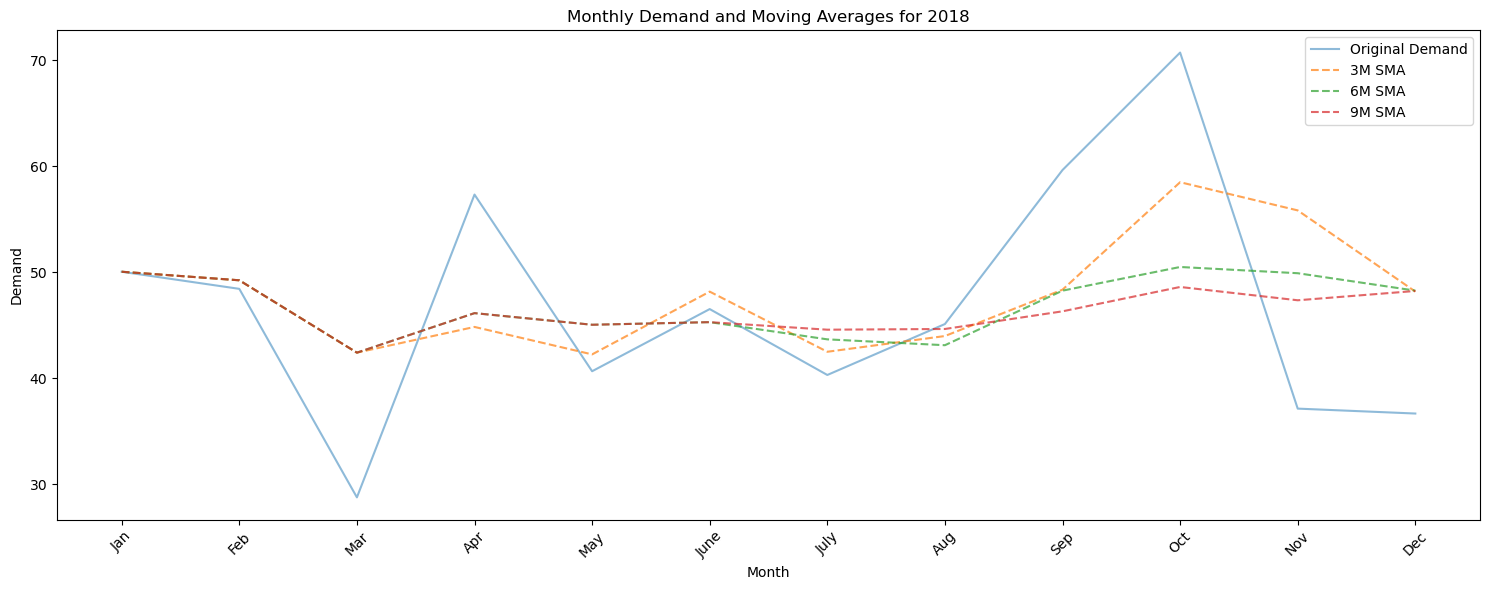

In [244]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

window_sizes = [3, 6, 9]

# Prepare month_names using the month portion of the column names
month_names = [df.columns[i].split()[0] for i in range(start_index, end_index)]

# Visualization
plt.figure(figsize=(15, 6))
plt.title('Monthly Demand and Moving Averages for 2018')
plt.xlabel('Month')
plt.ylabel('Demand')

# Calculate and plot the mean demand for each month
mean_demands = df.iloc[:, start_index:end_index].mean()
plt.plot(month_names, mean_demands, label='Original Demand', alpha=0.5)

# Calculate and plot the moving averages for different window sizes
for window in window_sizes:
    ma_demands = mean_demands.rolling(window=window, min_periods=1).mean()
    plt.plot(month_names, ma_demands, label=f'{window}M SMA', linestyle='--', alpha=0.7)

# Setting x-axis ticks and labels
plt.xticks(month_names, rotation=45)
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

plt.legend()
plt.tight_layout()
plt.show()

- The 3-month SMA (short-dashed line) is closer to the original demand line and reflects more of the short-term fluctuations.
- The 6-month SMA (medium-dashed line) is smoother than the 3-month SMA and starts to lag behind the changes in demand due to its wider window.
- The 9-month SMA (long-dashed line) is the smoothest curve, showing less responsiveness to changes in demand compared to the 3M and 6M SMAs. This is because it averages out the demand over a longer period.

#### Year 2019

In [229]:
# months colums for year 2019
start_index, end_index = 46, 58

In [230]:
print(df.iloc[:, start_index:end_index].head())

   Jan (2019)  Feb (2019)  Mar (2019)  Apr (2019)  May (2019)  June (2019)  \
0         6.0         6.0         6.0         6.0         6.0          7.0   
1        10.0        10.0        10.0        10.0        10.0         10.0   
2         4.0         5.0         4.0         4.0         5.0          5.0   
3         5.0         5.0         4.0         4.0         5.0          5.0   
4         5.0         4.0         4.0         5.0         4.0          5.0   

   July (2019)  Aug (2019)  Sep (2019)  Oct (2019)  Nov (2019)  Dec (2019)  
0          7.0         6.0         6.0         6.0         6.0         6.0  
1          4.0        10.0        11.0        11.0        11.0        11.0  
2          5.0         5.0         5.0         5.0         5.0         5.0  
3          4.0         5.0         6.0         5.0         5.0         5.0  
4          5.0         4.0         4.0         4.0         4.0         4.0  


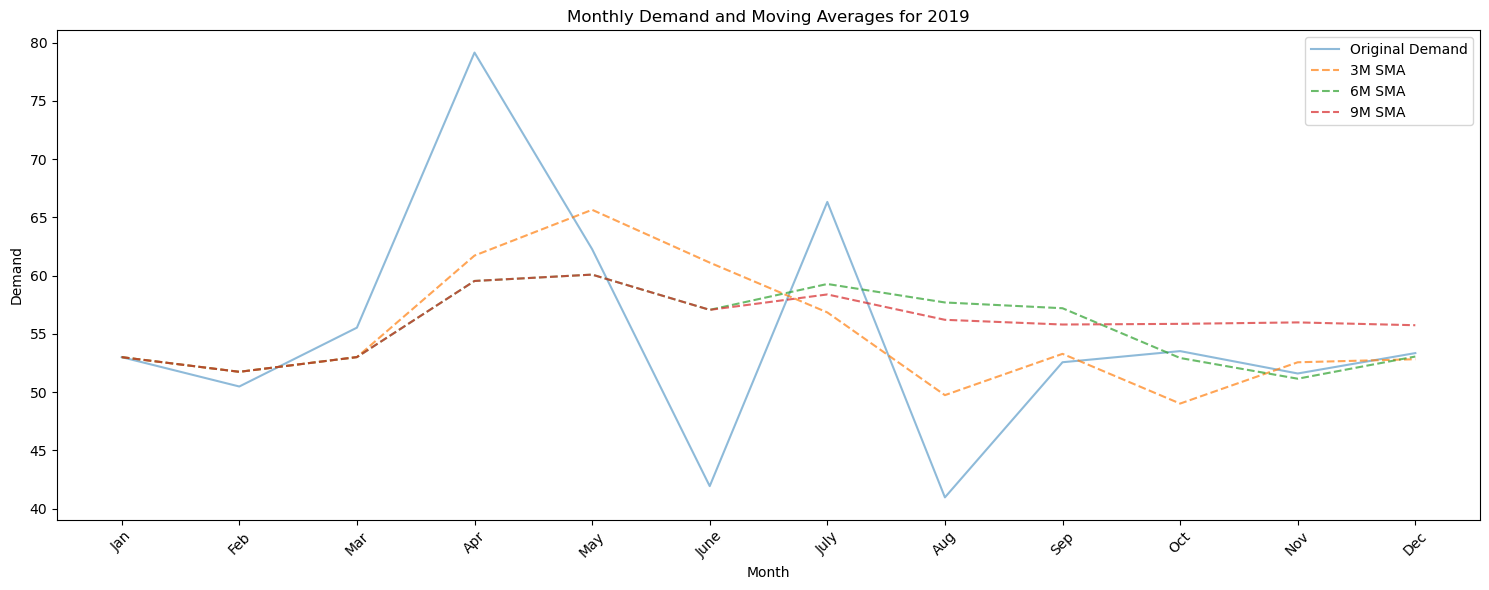

In [231]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

window_sizes = [3, 6, 9]

# Prepare month_names using the month portion of the column names
month_names = [df.columns[i].split()[0] for i in range(start_index, end_index)]

# Visualization
plt.figure(figsize=(15, 6))
plt.title('Monthly Demand and Moving Averages for 2019')
plt.xlabel('Month')
plt.ylabel('Demand')

# Calculate and plot the mean demand for each month
mean_demands = df.iloc[:, start_index:end_index].mean()
plt.plot(month_names, mean_demands, label='Original Demand', alpha=0.5)

# Calculate and plot the moving averages for different window sizes
for window in window_sizes:
    ma_demands = mean_demands.rolling(window=window, min_periods=1).mean()
    plt.plot(month_names, ma_demands, label=f'{window}M SMA', linestyle='--', alpha=0.7)

# Setting x-axis ticks and labels
plt.xticks(month_names, rotation=45)
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

plt.legend()
plt.tight_layout()
plt.show()

- The 3-month SMA (short-dashed line) closely tracks the original demand but smoothens out some of the variability. This SMA is the most responsive to changes in demand due to the smaller window size.
- The 6-month SMA (medium-dashed line) shows a greater level of smoothing and a lag, not capturing the peaks and troughs as closely as the 3-month SMA.
- The 9-month SMA (long-dashed line) is the smoothest of all and illustrates a lagging trend that does not closely follow the monthly changes in demand. This is expected due to the larger window size averaging out more months.

### Accuracy in Forecasting

In [232]:
# all
start_index, end_index = 34, 58

Using historical data (2018) to build the model and then test its accuracy on future data (2019).

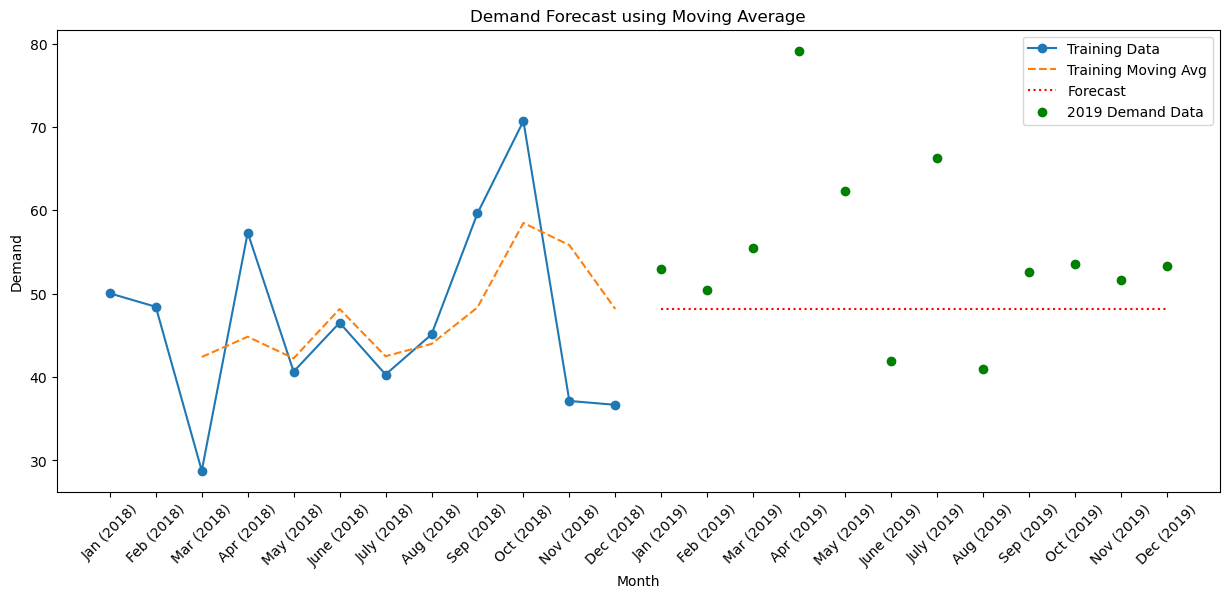

In [257]:
# Identify the indices for columns corresponding to 2018 and 2019
start_index_2018 = df.columns.get_loc("Jan (2018)")
end_index_2018 = df.columns.get_loc("Dec (2018)")
start_index_2019 = df.columns.get_loc("Jan (2019)")
end_index_2019 = df.columns.get_loc("Dec (2019)")

# Calculate the moving average on the training data (2018)
train_data = df.iloc[:, start_index_2018:end_index_2018+1].mean(axis=0)
window_size = 3  # Example window size
train_moving_avg = train_data.rolling(window=window_size).mean()

# Prepare the forecast for 2019 based on the last moving average value from 2018
last_ma_value = train_moving_avg.iloc[-1]
forecast_length = end_index_2019 - start_index_2019 + 1
test_forecast = pd.Series([last_ma_value] * forecast_length, index=df.columns[start_index_2019:end_index_2019+1])

# Plot the training data, moving average, and test forecast
plt.figure(figsize=(15, 6))
plt.plot(train_data.index, train_data, label='Training Data', marker='o')
plt.plot(train_moving_avg.index, train_moving_avg, label='Training Moving Avg', linestyle='--')
plt.plot(test_forecast.index, test_forecast, label='Forecast', color='red', linestyle=':')

test_data = df.iloc[:, start_index_2019:end_index_2019+1].mean(axis=0)
plt.scatter(test_data.index, test_data, label='2019 Demand Data', color='green', zorder=5)

plt.xlabel('Month')
plt.ylabel('Demand')
plt.title('Demand Forecast using Moving Average')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [258]:
from sklearn.metrics import mean_squared_error

# Forecast Error (Actual - Predicted)
forecast_errors = test_data - test_forecast

# Mean Absolute Deviation (MAD)
mad = forecast_errors.abs().mean()

# Mean Squared Error (MSE)
mse = mean_squared_error(test_data, test_forecast)

# Mean Absolute Percentage Error (MAPE)
mape = (forecast_errors.abs() / test_data).mean() * 100

print(f"Forecast Errors: {forecast_errors}")
print(f"Mean Absolute Deviation (MAD): {mad}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")

Forecast Errors: Jan (2019)      4.839974
Feb (2019)      2.321360
Mar (2019)      7.369475
Apr (2019)     30.971903
May (2019)     14.106583
June (2019)    -6.227154
July (2019)    18.157258
Aug (2019)     -7.191390
Sep (2019)      4.402759
Oct (2019)      5.357158
Nov (2019)      3.438225
Dec (2019)      5.188102
dtype: float64
Mean Absolute Deviation (MAD): 9.130945099044736
Mean Squared Error (MSE): 145.69820314250742
Mean Absolute Percentage Error (MAPE): 15.277736753292281%


More explantion will be given on report, but these values don't make it seems like this is a good forcasting model?